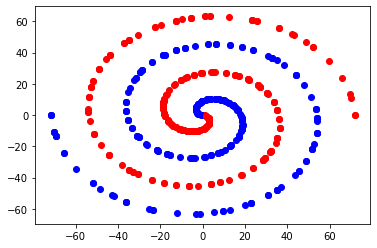

In [1]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np

np.random.seed(0)

X_coordinate = []
Y_coordinate = []
res = []

theta = 0
while(theta <= 720):
    r = theta
    # Red --> 1
    for i in range(random.randint(1,3)):
        X_coordinate.append((r*math.cos(2*math.pi*theta/360))/10)
        Y_coordinate.append((-r*math.sin(2*math.pi*theta/360))/10)
        res.append(1)
    #Blue --> 0
    for i in range(random.randint(1,3)):
        X_coordinate.append((-r*math.cos(2*math.pi*theta/360))/10)
        Y_coordinate.append((r*math.sin(2*math.pi*theta/360))/10)
        res.append(0)
    theta+=random.randint(1,10)
        
for i in range(len(res)):
    if res[i] == 1:
        plt.plot(X_coordinate[i], Y_coordinate[i], "ro")
    else:
        plt.plot(X_coordinate[i], Y_coordinate[i], "bo")
        
# print(max(X_coordinate))
# print(max(Y_coordinate))

In [2]:
# X = np.array([ [0,0], [0,1], [1,0], [1,1] ])
# Y = np.array([ [0], [1], [1], [0] ])
X = np.zeros(shape=(len(res),2))
Y = np.zeros(shape=(len(res),1))

for i in range(len(res)): 
    X[i] = [X_coordinate[i],Y_coordinate[i]]
    Y[i] = [res[i]]
    
# X
# Y

In [3]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 1
        
        self.learning_rate = 0.001
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))
        
    def Tanh(self, x, der=False):
#         y = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
#         dy=1-y**2
        if der == True:
            return 1 - x**2
        else:
            return (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.Tanh(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.Tanh(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.Tanh(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.Tanh(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

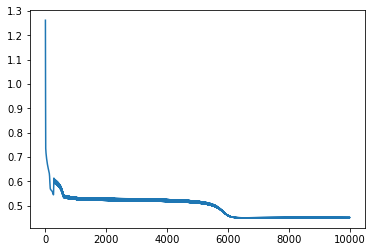

In [4]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

In [5]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 1
        
        self.learning_rate = 0.0000001
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))
        
    def ReLU(self, x, der=False):
        if der == True:
            return 1. * (x > 0)
        else:
            return x * (x > 0)
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.ReLU(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.ReLU(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.ReLU(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.ReLU(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

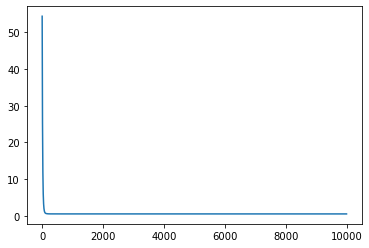

In [6]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)